### Système de recommendation très fortement corrélé avec [cette vidéo](https://www.youtube.com/watch?v=UoQyGG9mbSQ) 


In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATASET_PATH = '../datas/movies_dataset/'


## Chargement des dataframes

In [4]:
title_ratings = pd.read_csv(DATASET_PATH + "title.ratings.tsv", sep='\t', index_col='tconst')

print(len(title_ratings))
title_ratings.head()

993153


,averageRating,numVotes
tconst,,
tt0000001,5.6,1550
tt0000002,6.1,186
tt0000003,6.5,1207
tt0000004,6.2,113
tt0000005,6.1,1934


In [16]:
title_basics = pd.read_csv(DATASET_PATH + "title.basics.tsv", sep='\t', index_col='tconst', usecols=['titleType', 'primaryTitle', 'genres'])
title_basics = title_basics.set_index('tconst')
title_basics = title_basics[title_basics.titleType.str.contains('movie|tvMovie', regex=True)]

print(len(title_basics))
title_basics.head()

MemoryError: Unable to allocate 48.2 MiB for an array with shape (6321302,) and data type int64

## Merge et filtrage

In [5]:
movie_rating = pd.merge(title_ratings, title_basics, left_index=True, right_index=True)

print(len(movie_rating))
movie_rating = movie_rating[movie_rating.genres != '\\N']
print(len(movie_rating))
print(movie_rating.head())

283871
272140
           averageRating  numVotes titleType                   primaryTitle  \
tconst                                                                        
tt0000009            5.4        81     movie                     Miss Jerry   
tt0000147            5.2       310     movie  The Corbett-Fitzsimmons Fight   
tt0000335            6.2        39     movie          Soldiers of the Cross   
tt0000574            6.1       537     movie    The Story of the Kelly Gang   
tt0000615            4.8        14     movie             Robbery Under Arms   

                           genres  
tconst                             
tt0000009                 Romance  
tt0000147  Documentary,News,Sport  
tt0000335         Biography,Drama  
tt0000574   Biography,Crime,Drama  
tt0000615                   Drama  


&lt;AxesSubplot:&gt;

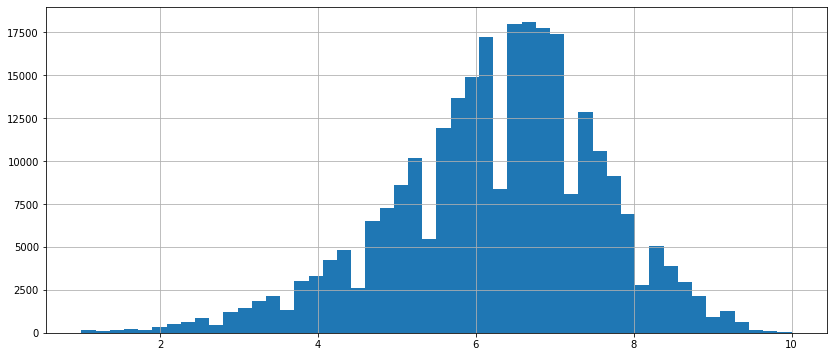

In [6]:
plt.figure(figsize=(14,6))
movie_rating.averageRating.hist(bins=50)

&lt;AxesSubplot:&gt;

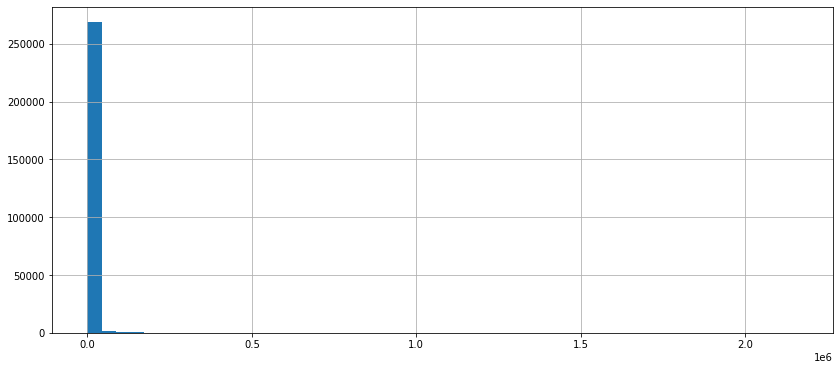

In [7]:
plt.figure(figsize=(14,6))
movie_rating.numVotes.hist(bins=50)

### Filtrage par nombre de votes et drop des colonnes 'titleType' et 'numVotes'
Note: une variable prctage définie la proportion de film sélectionnés (entre 0 et 1)

In [8]:
prctage = 0.99
movie_rating_light = movie_rating

print('Filtre: les film doivent avoir au moins ', movie_rating_light.quantile(prctage).numVotes, ' votes pour être sélectionnés')
movie_rating_light = movie_rating_light[movie_rating.numVotes > movie_rating_light.quantile(prctage).numVotes]
# movie_rating_light = movie_rating_light.drop(columns=['titleType', 'numVotes'])
movie_rating_light = movie_rating_light.drop(columns=['titleType'])
print(movie_rating_light.head())

del(prctage)

Filtre: les film doivent avoir au moins  60795.87999999989  votes pour être sélectionnés
           averageRating  numVotes   primaryTitle                   genres
tconst                                                                    
tt0012349            8.3    101632        The Kid      Comedy,Drama,Family
tt0013442            7.9     82878      Nosferatu           Fantasy,Horror
tt0015864            8.2     91969  The Gold Rush   Adventure,Comedy,Drama
tt0017136            8.3    148413     Metropolis             Drama,Sci-Fi
tt0017925            8.1     73750    The General  Action,Adventure,Comedy


## Manipulations graphiques

&lt;AxesSubplot:&gt;

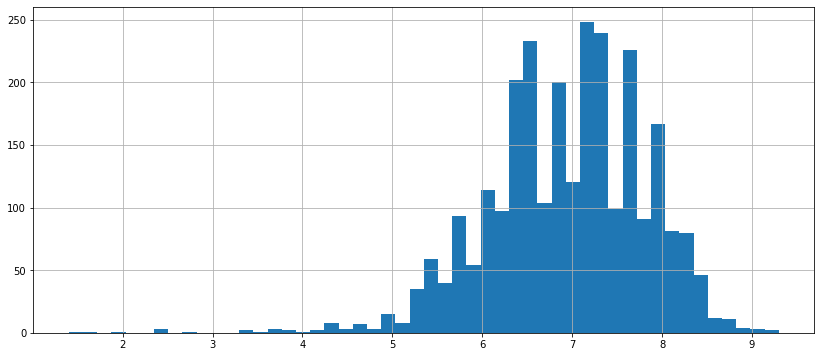

In [9]:
plt.figure(figsize=(14,6))
movie_rating_light.averageRating.hist(bins=50)

&lt;AxesSubplot:&gt;

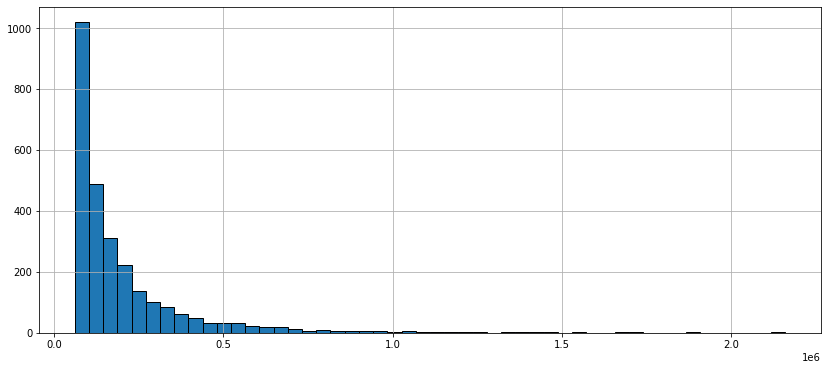

In [10]:
plt.figure(figsize=(14,6))
plt.rcParams['patch.force_edgecolor'] = True
movie_rating_light.numVotes.hist(bins=50)

&lt;seaborn.axisgrid.JointGrid at 0x3a1505c8&gt;

&lt;Figure size 1008x432 with 0 Axes&gt;

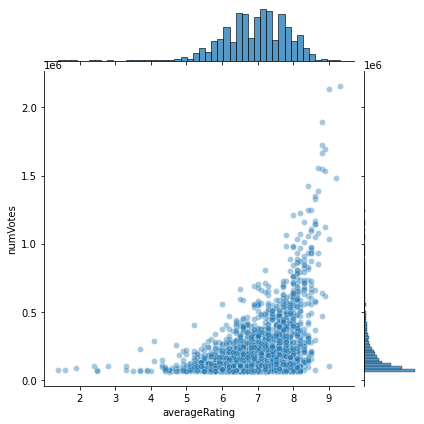

In [11]:
plt.figure(figsize=(14,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='averageRating', y='numVotes', data=movie_rating_light, alpha=0.4)

## Creation d'une matrice de notation des films

In [12]:
movie_rating_light.head()

,averageRating,numVotes,primaryTitle,genres
tconst,,,,
tt0012349,8.3,101632,The Kid,"Comedy,Drama,Family"
tt0013442,7.9,82878,Nosferatu,"Fantasy,Horror"
tt0015864,8.2,91969,The Gold Rush,"Adventure,Comedy,Drama"
tt0017136,8.3,148413,Metropolis,"Drama,Sci-Fi"
tt0017925,8.1,73750,The General,"Action,Adventure,Comedy"


In [13]:
matrice_notation = movie_rating_light.pivot_table(values='averageRating', columns='primaryTitle')
matrice_notation.head()

primaryTitle,10 Cloverfield Lane,10 Things I Hate About You,"10,000 BC",101 Dalmatians,12 Angry Men,12 Monkeys,12 Years a Slave,127 Hours,13 Going on 30,13 Hours,...,Zoolander,Zoolander 2,Zootopia,[Rec] 2,eXistenZ,xXx,xXx: Return of Xander Cage,xXx: State of the Union,¡Three Amigos!,Æon Flux
averageRating,7.2,7.3,5.1,5.7,8.9,8.0,8.1,7.6,6.1,7.3,...,6.5,4.7,8.0,6.5,6.8,5.9,5.2,4.4,6.5,5.4


In [14]:
note1 = matrice_notation['My Week with Marilyn']
movies_similar = matrice_notation.corrwith(note1)
movies_correlation = pd.DataFrame(movies_similar, columns=['Correlation'])
movies_correlation = movies_correlation.dropna()
movies_correlation = movies_correlation.sort_values('Correlation', ascending=False)
movies_correlation.head()

,Correlation
primaryTitle,


## Des tests de correlation


In [15]:
df = pd.DataFrame([[0, 2, 3], [0, 4, 1], [10, 20, 30]], columns=['A', 'B', 'C'])
print(df.head())

test2 = pd.Series([2, 5, 18])
print('\n', test2)

test1 = df['C']
print('\n', test1)

test_similar = df.corrwith(test2)
test_correlation = pd.DataFrame(test_similar, columns=['Correlation'])
# test_correlation = test_correlation.dropna()
test_correlation = test_correlation.sort_values('Correlation', ascending=False)
test_correlation.head()

    A   B   C
0   0   2   3
1   0   4   1
2  10  20  30

 0     2
1     5
2    18
dtype: int64

 0     3
1     1
2    30
Name: C, dtype: int64


,Correlation
B,0.997131
A,0.984324
C,0.971557
